In [1]:
import cv2
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

# Define paths
path = r"C:\Users\mathe\Ufal\PDI\Deffect-detection\lego"
train_csv_path = r"C:\Users\mathe\Ufal\PDI\Deffect-detection\train.csv"
test_csv_path = r"C:\Users\mathe\Ufal\PDI\Deffect-detection\test.csv"

# Load CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Extract image IDs
train_ids = set(train_df['example_id'].values)
test_ids = set(test_df['example_id'].values)

print(f"Número de IDs de treino: {len(train_ids)}")
print(f"Número de IDs de teste: {len(test_ids)}")
print(f"Primeiros 5 IDs de treino: {list(train_ids)[:5]}")
print(f"Primeiros 5 IDs de teste: {list(test_ids)[:5]}")

Número de IDs de treino: 90
Número de IDs de teste: 33
Primeiros 5 IDs de treino: ['jypgsvadm', 'aymdvsgjp', 'yajmgvpsd', 'gayjdmsvp', 'sgvydajmp']
Primeiros 5 IDs de teste: ['vajmygdps', 'sdpygmjva', 'dpyagjmsv', 'pjdgasymv', 'ydsvmjagp']


In [2]:
# Load and organize images
train_images = []
test_images = []
unknown_images = []

# Get all image files from the lego directory
image_files = [f for f in os.listdir(path) if f.lower().endswith('.jpg')]
print(f"Total de imagens encontradas: {len(image_files)}")

# Process each image file
for filename in image_files:
    # Extract image ID (filename without extension)
    img_id = filename.split('.')[0]
    
    # Load image
    img_path_full = os.path.join(path, filename)
    img = cv2.imread(img_path_full, cv2.IMREAD_COLOR)
    
    if img is None:
        print(f"Erro ao carregar imagem: {filename}")
        continue
    
    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Classify image based on CSV data
    if img_id in train_ids:
        train_images.append((img_rgb, img_id, filename))
    elif img_id in test_ids:
        test_images.append((img_rgb, img_id, filename))
    else:
        unknown_images.append((img_rgb, img_id, filename))

print(f"\nImagens organizadas:")
print(f"Treino: {len(train_images)} imagens")
print(f"Teste: {len(test_images)} imagens")
print(f"Desconhecidas: {len(unknown_images)} imagens")

# Verify all CSV IDs have corresponding images
missing_train = train_ids - {img[1] for img in train_images}
missing_test = test_ids - {img[1] for img in test_images}

if missing_train:
    print(f"\nIDs de treino sem imagens correspondentes: {missing_train}")
if missing_test:
    print(f"IDs de teste sem imagens correspondentes: {missing_test}")

print(f"\nOrganização concluída com sucesso!")

Total de imagens encontradas: 123

Imagens organizadas:
Treino: 90 imagens
Teste: 33 imagens
Desconhecidas: 0 imagens

Organização concluída com sucesso!

Imagens organizadas:
Treino: 90 imagens
Teste: 33 imagens
Desconhecidas: 0 imagens

Organização concluída com sucesso!


=== AMOSTRAS DO CONJUNTO DE TREINO ===


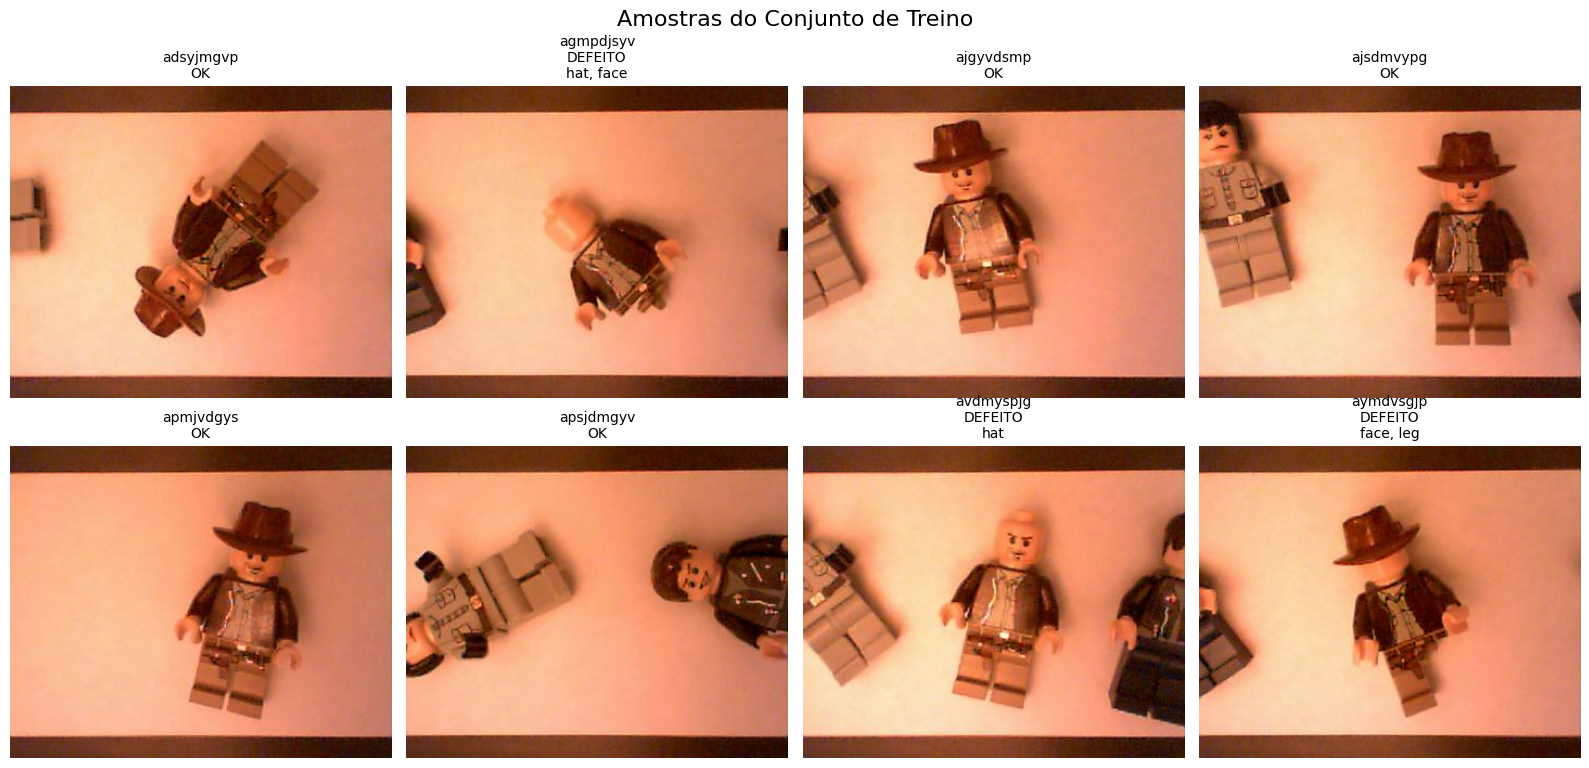

In [3]:
# Display sample images from training set
print("=== AMOSTRAS DO CONJUNTO DE TREINO ===")
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Amostras do Conjunto de Treino', fontsize=16)

# Show first 8 training images
for i in range(min(8, len(train_images))):
    row = i // 4
    col = i % 4
    
    img, img_id, filename = train_images[i]
    axes[row, col].imshow(img)
    
    # Get defect information from train_df
    img_info = train_df[train_df['example_id'] == img_id].iloc[0]
    has_defect = img_info['has_deffect']
    status = "DEFEITO" if has_defect == 1 else "OK"
    
    # Get defect types
    defect_cols = ['no_hat', 'no_face', 'no_head', 'no_leg', 'no_body', 'no_hand', 'no_arm']
    defects = [col.replace('no_', '') for col in defect_cols if img_info[col] == 1]
    
    title = f"{img_id}\n{status}"
    if defects:
        title += f"\n{', '.join(defects[:2])}"
    
    axes[row, col].set_title(title, fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


=== AMOSTRAS DO CONJUNTO DE TESTE ===


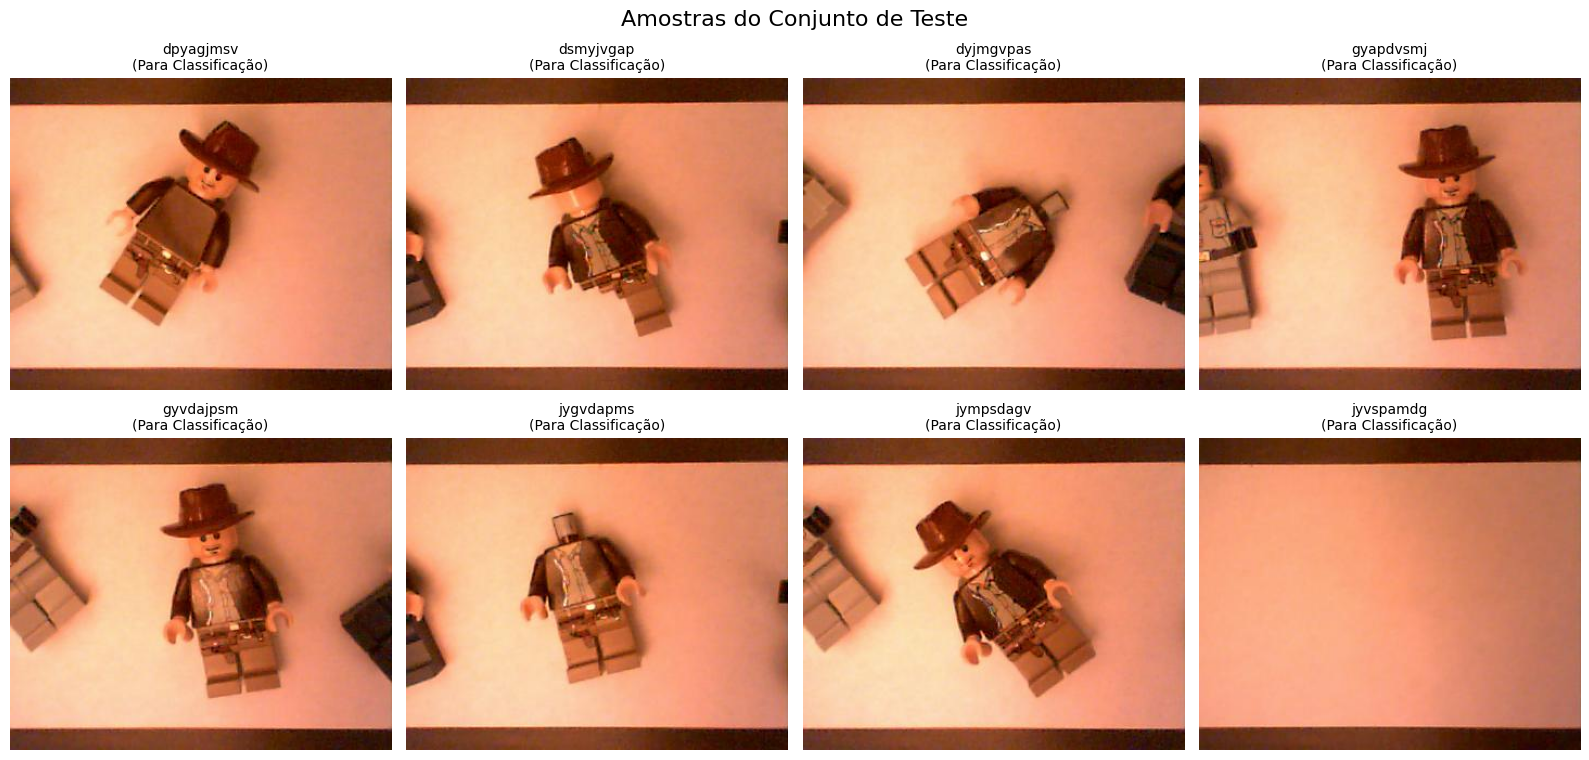

In [4]:
# Display sample images from test set
print("\n=== AMOSTRAS DO CONJUNTO DE TESTE ===")
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Amostras do Conjunto de Teste', fontsize=16)

# Show first 8 test images
for i in range(min(8, len(test_images))):
    row = i // 4
    col = i % 4
    
    img, img_id, filename = test_images[i]
    axes[row, col].imshow(img)
    axes[row, col].set_title(f"{img_id}\n(Para Classificação)", fontsize=10)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


=== ANÁLISE DE DISTRIBUIÇÃO DE DEFEITOS (TREINO) ===
has_deffect: 62/90 (68.9%)
no_hat: 18/90 (20.0%)
no_face: 21/90 (23.3%)
no_head: 4/90 (4.4%)
no_leg: 13/90 (14.4%)
no_body: 8/90 (8.9%)
no_hand: 20/90 (22.2%)
no_arm: 10/90 (11.1%)


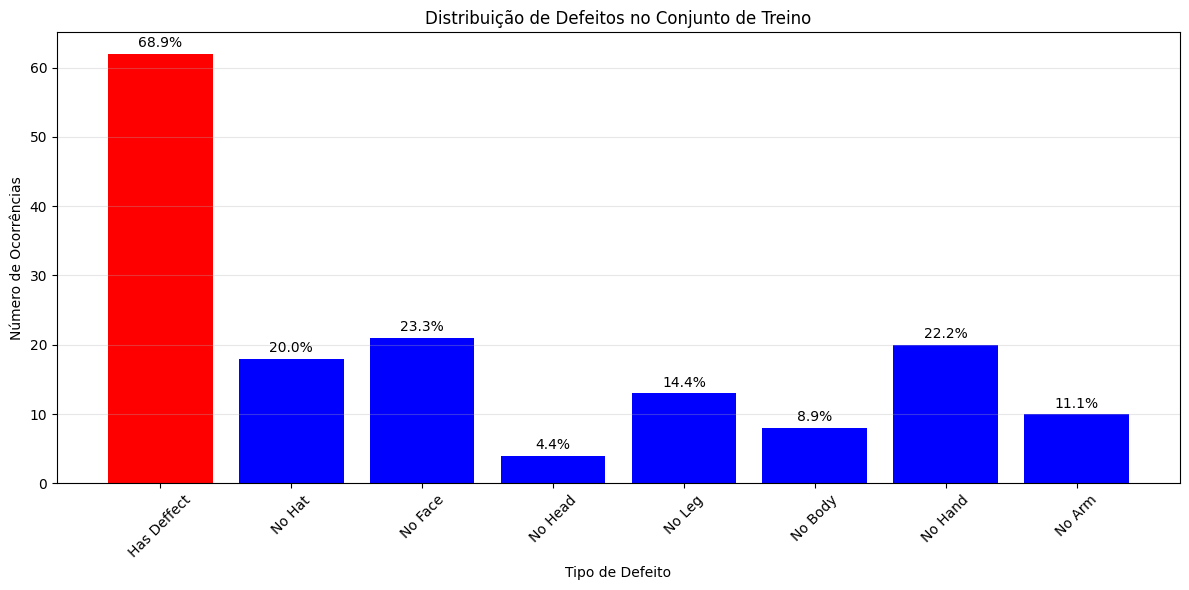


Resumo:
Total de imagens de treino: 90
Imagens com defeito: 62 (68.9%)
Imagens sem defeito: 28 (31.1%)


In [5]:
# Analyze defect distribution in training set
print("\n=== ANÁLISE DE DISTRIBUIÇÃO DE DEFEITOS (TREINO) ===")

# Count defects by type
defect_counts = {}
defect_cols = ['has_deffect', 'no_hat', 'no_face', 'no_head', 'no_leg', 'no_body', 'no_hand', 'no_arm']

for col in defect_cols:
    count = train_df[col].sum()
    total = len(train_df)
    percentage = (count / total) * 100
    defect_counts[col] = {'count': count, 'percentage': percentage}
    print(f"{col}: {count}/{total} ({percentage:.1f}%)")

# Create a bar plot of defect distribution
plt.figure(figsize=(12, 6))
defect_names = [col.replace('_', ' ').title() for col in defect_cols]
counts = [defect_counts[col]['count'] for col in defect_cols]

plt.bar(defect_names, counts, color=['red' if 'has_deffect' in col else 'blue' for col in defect_cols])
plt.title('Distribuição de Defeitos no Conjunto de Treino')
plt.xlabel('Tipo de Defeito')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for i, count in enumerate(counts):
    percentage = (count / len(train_df)) * 100
    plt.text(i, count + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\nResumo:")
print(f"Total de imagens de treino: {len(train_df)}")
print(f"Imagens com defeito: {defect_counts['has_deffect']['count']} ({defect_counts['has_deffect']['percentage']:.1f}%)")
print(f"Imagens sem defeito: {len(train_df) - defect_counts['has_deffect']['count']} ({100 - defect_counts['has_deffect']['percentage']:.1f}%)")

In [6]:
# Save organized data for further processing
print("\n=== SALVANDO DADOS ORGANIZADOS ===")

# Create dictionaries for easy access
train_data = {}
test_data = {}

for img, img_id, filename in train_images:
    train_data[img_id] = {
        'image': img,
        'filename': filename,
        'labels': train_df[train_df['example_id'] == img_id].iloc[0].to_dict()
    }

for img, img_id, filename in test_images:
    test_data[img_id] = {
        'image': img,
        'filename': filename
    }

print(f"Dados de treino organizados: {len(train_data)} imagens")
print(f"Dados de teste organizados: {len(test_data)} imagens")

# Show some statistics
print(f"\nEstatísticas das imagens:")
if train_images:
    sample_img = train_images[0][0]
    print(f"Dimensões das imagens: {sample_img.shape}")
    print(f"Tipo de dados: {sample_img.dtype}")
    print(f"Valores min/max: {sample_img.min()}/{sample_img.max()}")

print("\n✅ Dados carregados e organizados com sucesso!")
print("📁 Use 'train_data' para acessar imagens de treino com labels")
print("📁 Use 'test_data' para acessar imagens de teste")
print("🖼️ Formato: train_data[img_id]['image'] para a imagem")
print("🏷️ Formato: train_data[img_id]['labels'] para os labels")


=== SALVANDO DADOS ORGANIZADOS ===
Dados de treino organizados: 90 imagens
Dados de teste organizados: 33 imagens

Estatísticas das imagens:
Dimensões das imagens: (288, 352, 3)
Tipo de dados: uint8
Valores min/max: 0/255

✅ Dados carregados e organizados com sucesso!
📁 Use 'train_data' para acessar imagens de treino com labels
📁 Use 'test_data' para acessar imagens de teste
🖼️ Formato: train_data[img_id]['image'] para a imagem
🏷️ Formato: train_data[img_id]['labels'] para os labels
Valores min/max: 0/255

✅ Dados carregados e organizados com sucesso!
📁 Use 'train_data' para acessar imagens de treino com labels
📁 Use 'test_data' para acessar imagens de teste
🖼️ Formato: train_data[img_id]['image'] para a imagem
🏷️ Formato: train_data[img_id]['labels'] para os labels


In [7]:
# Helper functions for easy data access
def get_train_image(img_id):
    """Get training image by ID"""
    if img_id in train_data:
        return train_data[img_id]['image']
    else:
        print(f"ID {img_id} não encontrado no conjunto de treino")
        return None

def get_test_image(img_id):
    """Get test image by ID"""
    if img_id in test_data:
        return test_data[img_id]['image']
    else:
        print(f"ID {img_id} não encontrado no conjunto de teste")
        return None

def get_train_labels(img_id):
    """Get training labels by ID"""
    if img_id in train_data:
        return train_data[img_id]['labels']
    else:
        print(f"ID {img_id} não encontrado no conjunto de treino")
        return None

def get_defective_images(defect_type=None):
    """Get images with specific defect type or all defective images"""
    defective = []
    
    for img_id, data in train_data.items():
        labels = data['labels']
        
        if defect_type is None:
            # Return all defective images
            if labels['has_deffect'] == 1:
                defective.append((img_id, data['image'], labels))
        else:
            # Return images with specific defect
            if defect_type in labels and labels[defect_type] == 1:
                defective.append((img_id, data['image'], labels))
    
    return defective

def show_defect_examples(defect_type, max_examples=4):
    """Show examples of a specific defect type"""
    examples = get_defective_images(defect_type)
    
    if not examples:
        print(f"Nenhum exemplo encontrado para {defect_type}")
        return
    
    n_examples = min(max_examples, len(examples))
    
    fig, axes = plt.subplots(1, n_examples, figsize=(4*n_examples, 4))
    if n_examples == 1:
        axes = [axes]
    
    fig.suptitle(f'Exemplos de {defect_type.replace("_", " ").title()}', fontsize=14)
    
    for i in range(n_examples):
        img_id, img, labels = examples[i]
        axes[i].imshow(img)
        axes[i].set_title(f"{img_id}", fontsize=10)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Mostrando {n_examples} de {len(examples)} exemplos de {defect_type}")

print("\n🔧 Funções auxiliares definidas:")
print("• get_train_image(img_id) - Obter imagem de treino")
print("• get_test_image(img_id) - Obter imagem de teste")
print("• get_train_labels(img_id) - Obter labels de treino")
print("• get_defective_images(defect_type) - Obter imagens com defeito específico")
print("• show_defect_examples(defect_type) - Mostrar exemplos de defeito")


🔧 Funções auxiliares definidas:
• get_train_image(img_id) - Obter imagem de treino
• get_test_image(img_id) - Obter imagem de teste
• get_train_labels(img_id) - Obter labels de treino
• get_defective_images(defect_type) - Obter imagens com defeito específico
• show_defect_examples(defect_type) - Mostrar exemplos de defeito



=== EXEMPLO DE USO DAS FUNÇÕES AUXILIARES ===

No Hat: 18 exemplos


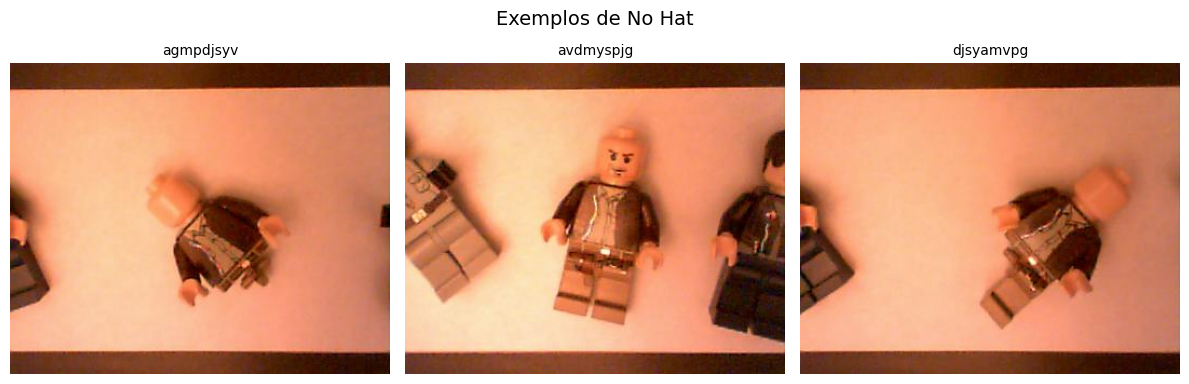

Mostrando 3 de 18 exemplos de no_hat

No Face: 21 exemplos


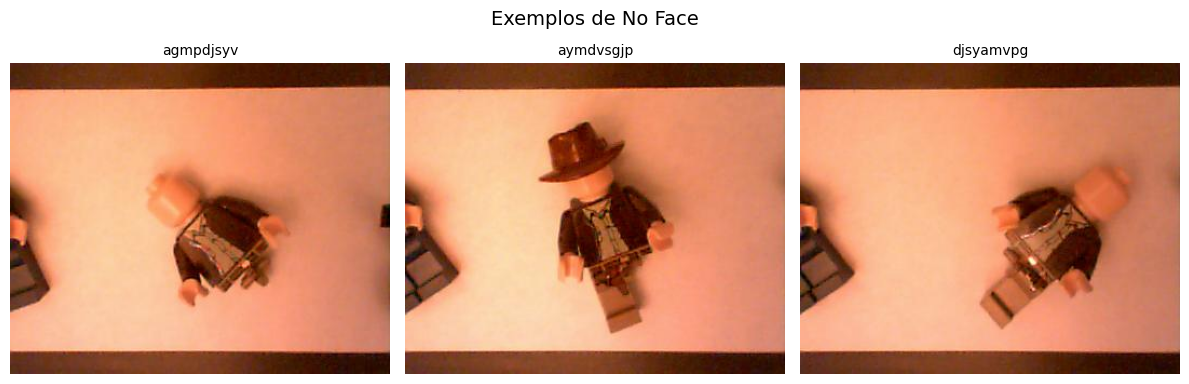

Mostrando 3 de 21 exemplos de no_face

No Head: 4 exemplos


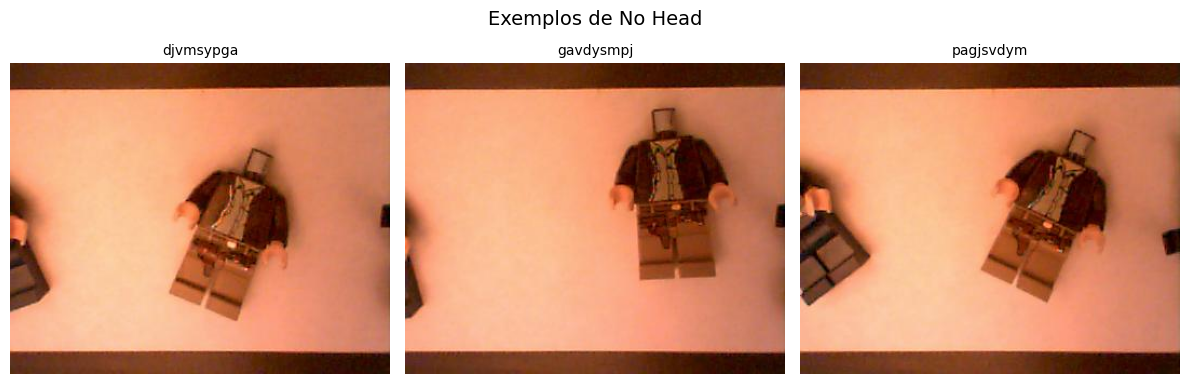

Mostrando 3 de 4 exemplos de no_head

No Leg: 13 exemplos


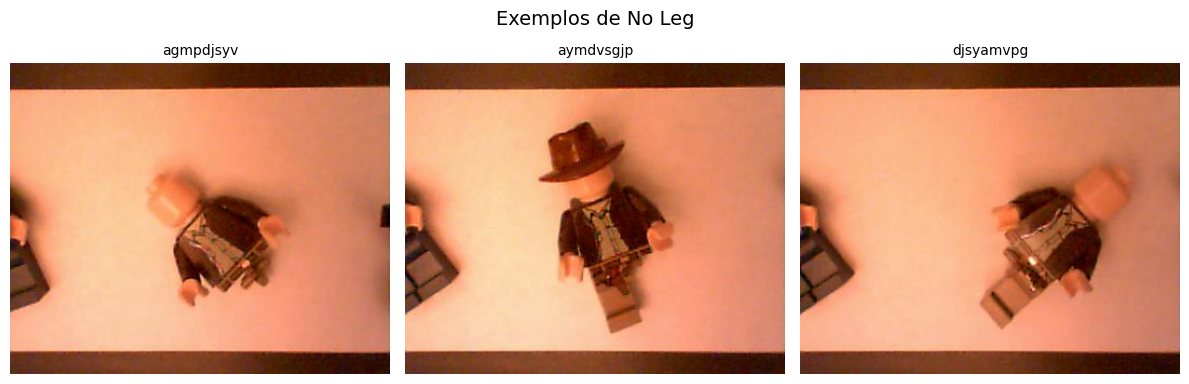

Mostrando 3 de 13 exemplos de no_leg

No Body: 8 exemplos


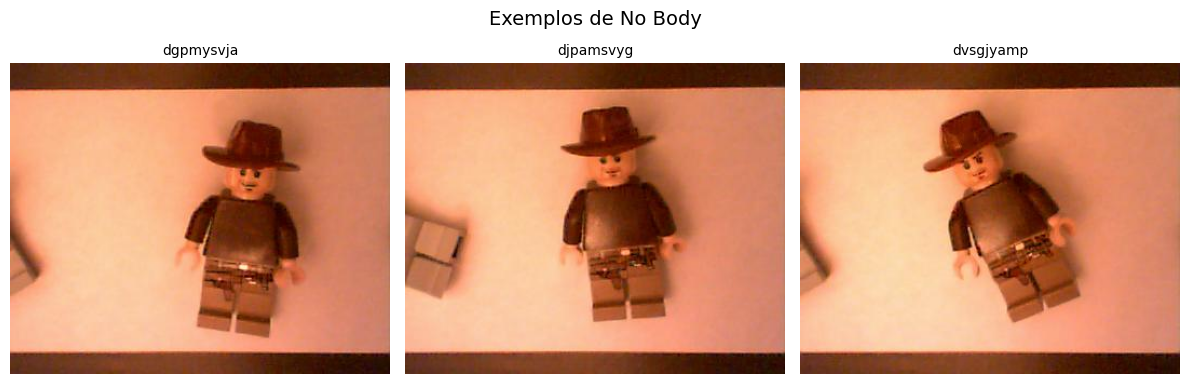

Mostrando 3 de 8 exemplos de no_body

No Hand: 20 exemplos


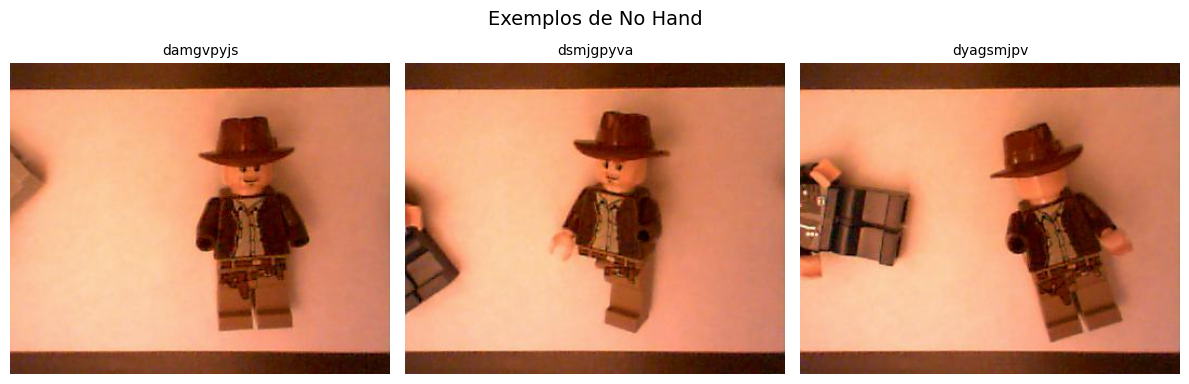

Mostrando 3 de 20 exemplos de no_hand

No Arm: 10 exemplos


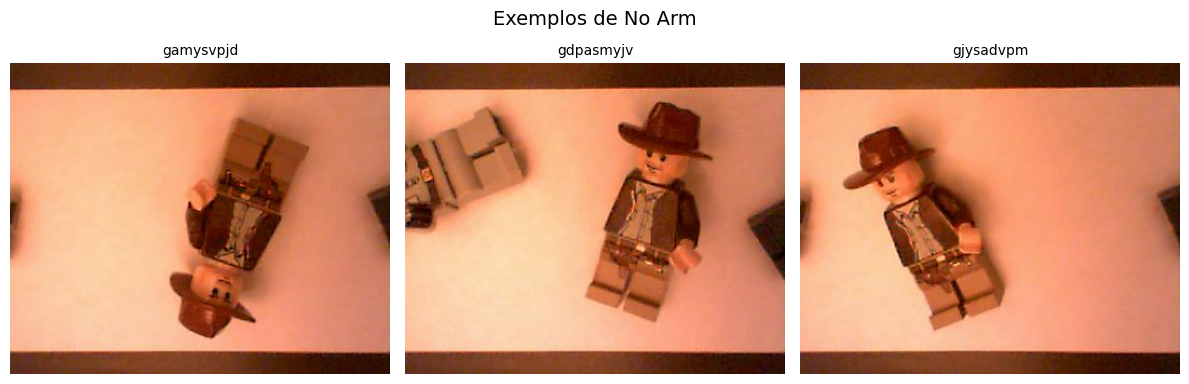

Mostrando 3 de 10 exemplos de no_arm


In [8]:
# Example usage of helper functions
print("\n=== EXEMPLO DE USO DAS FUNÇÕES AUXILIARES ===")

# Show examples of different defect types
defect_types = ['no_hat', 'no_face', 'no_head', 'no_leg', 'no_body', 'no_hand', 'no_arm']

for defect in defect_types:
    examples = get_defective_images(defect)
    if examples:
        print(f"\n{defect.replace('_', ' ').title()}: {len(examples)} exemplos")
        show_defect_examples(defect, max_examples=3)
    else:
        print(f"\n{defect.replace('_', ' ').title()}: Nenhum exemplo encontrado")